## Import Necessary Libraries

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
glass_data = pd.read_csv('Glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Understandng

##### Data Description:
* RI : refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* AI: Aluminum
* Si: Silicon
* K:Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
##### Type: Type of glass: (class attribute)
* 1 -- building_windows_float_processed
* 2 --building_windows_non_float_processed
* 3 --vehicle_windows_float_processed
* 4 --vehicle_windows_non_float_processed (none in this database)
* 5 --containers
* 6 --tableware
* 7 --headlamps

In [3]:
glass_data.shape

(214, 10)

In [4]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Data Visualization

<Figure size 576x576 with 0 Axes>

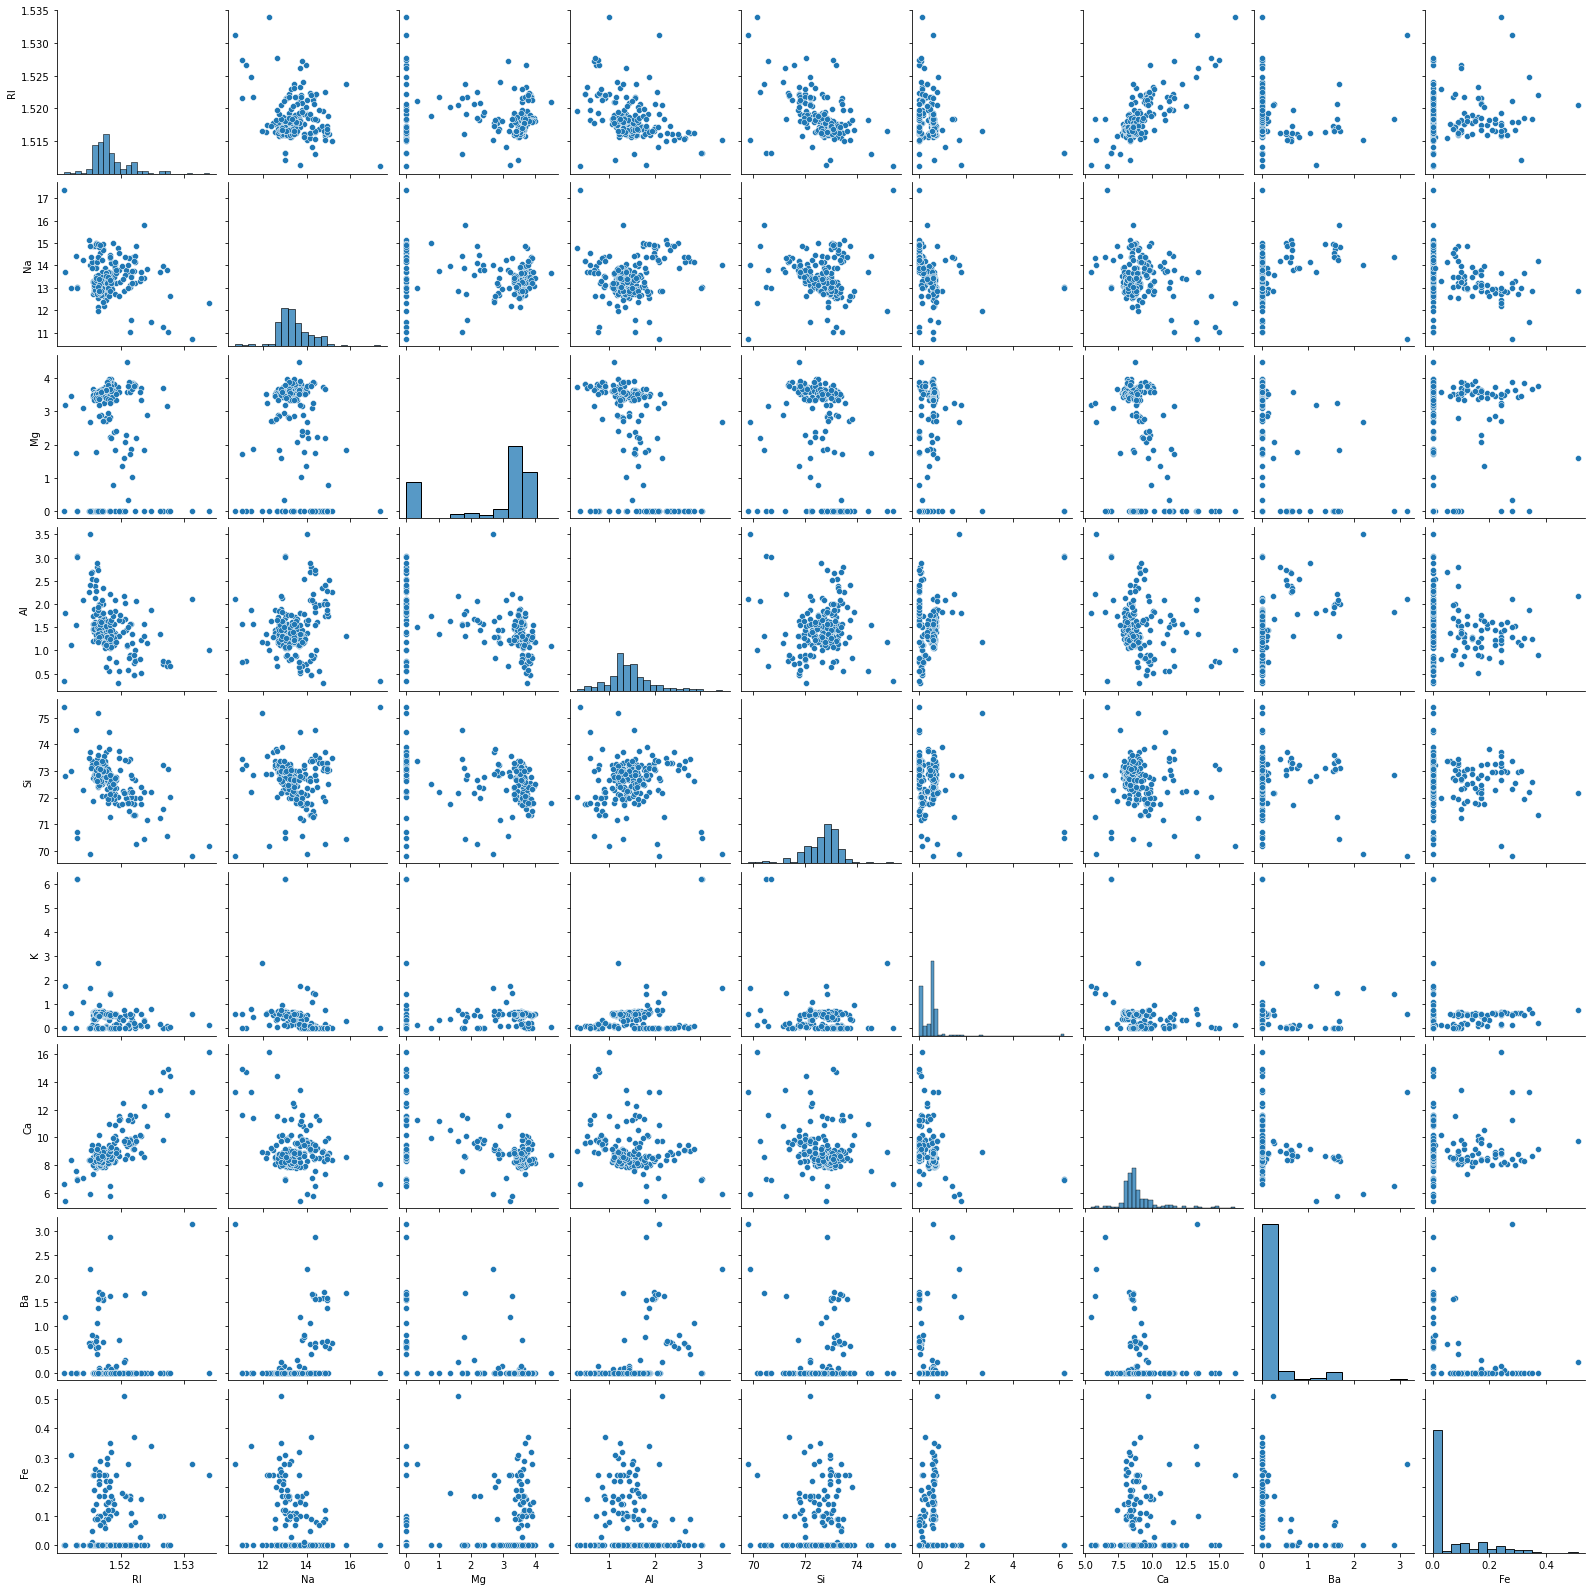

In [7]:
features = glass_data.columns[:-1].tolist()
plt.figure(figsize=(8,8))
sns.pairplot(glass_data[features],palette='coolwarm')
plt.show()

## Model Building

In [8]:
X = glass_data.drop(['Type'],axis=1)
y = glass_data['Type']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171,), (43, 9), (43,))

## Model Training,Testing, Evaluation without normalization

### Pick up Optimum Number of K

In [10]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    glass_knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = glass_knn_model,X=X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [11]:
cv_scores

[0.6502164502164502,
 0.6502164502164502,
 0.6454545454545455,
 0.6270562770562771,
 0.5948051948051949,
 0.5898268398268398,
 0.6090909090909091,
 0.6041125541125542,
 0.6183982683982685,
 0.637012987012987,
 0.6277056277056278,
 0.6231601731601732,
 0.6186147186147186,
 0.6279220779220779,
 0.6277056277056278,
 0.6229437229437229,
 0.6136363636363636,
 0.6041125541125542,
 0.6134199134199134,
 0.5993506493506493,
 0.5805194805194804,
 0.5945887445887446,
 0.59025974025974,
 0.5759740259740259,
 0.5714285714285714]

In [12]:
neighbours[cv_scores.index(max(cv_scores))]

1

## Rebuild the Model by choosing 1 as the neighrest neighbour

In [13]:
glass_knn_model = KNeighborsClassifier(n_neighbors=1)
glass_knn_model.fit(X_train,y_train)
glass_y_pred = glass_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,glass_y_pred),4))

Accuracy score:  0.7209


## Model Training,Model Testing,Evaluation With Normalization

In [14]:
scalar= StandardScaler()
scalar_X = scalar.fit_transform(X)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(scalar_X,y,test_size=0.20,random_state=12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171,), (43, 9), (43,))

In [16]:
X_train

array([[-1.20610400e-01,  3.70875159e-01,  8.65488567e-01, ...,
        -5.26095044e-01, -3.52876828e-01,  9.56587946e-01],
       [-1.70159374e+00, -5.00618371e-01, -1.86551055e+00, ...,
        -1.42761494e+00, -3.52876828e-01, -5.86450902e-01],
       [-1.73419864e-01, -4.02421917e-01,  5.59727851e-01, ...,
        -3.28887568e-01, -3.52876828e-01, -5.86450902e-01],
       ...,
       [ 1.24253390e+00,  9.84602997e-01,  7.89048388e-01, ...,
         4.31769840e-01, -3.52876828e-01, -5.86450902e-01],
       [-3.61553581e-01,  1.58605628e+00, -1.86551055e+00, ...,
        -4.90385747e-03,  9.77617652e-01, -5.86450902e-01],
       [ 4.25267336e+00, -3.28694275e+00, -1.86551055e+00, ...,
         3.05885515e+00,  5.99721046e+00,  2.29388828e+00]])

In [17]:
X_test

array([[ 4.77197670e-02, -2.55127236e-01,  6.57015352e-01,
        -7.52670580e-01,  2.31729707e-01,  1.12106515e-01,
        -3.85232561e-01, -1.71445763e-01,  1.16232646e+00],
       [-7.51023380e-01,  1.96656754e+00, -1.86551055e+00,
         2.13830494e+00,  5.16433114e-01, -6.87074327e-01,
        -8.94213472e-02,  7.15550557e-01, -5.86450902e-01],
       [ 1.23593271e+00,  9.60053883e-01,  7.61251959e-01,
        -1.07389008e+00, -1.67060670e+00, -4.10434805e-01,
         1.28915501e-01, -3.52876828e-01,  3.21971159e+00],
       [-5.45985699e-02, -9.67051528e-01,  5.24430284e-02,
        -1.23449983e+00,  1.49995398e+00, -2.26008457e-01,
         3.26122977e-01, -3.52876828e-01,  1.47093423e+00],
       [ 1.83044019e-01,  6.40112399e-02,  7.95997495e-01,
        -3.71222421e-01, -1.30620085e-01,  1.12106515e-01,
        -5.26095044e-01, -3.52876828e-01,  8.53718690e-01],
       [ 1.12371260e+00, -2.55127236e-01,  6.91760888e-01,
        -5.92060829e-01,  1.28201195e-01,  6.599992

## Pick up optimum number of K

In [18]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    glass_knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = glass_knn_model,X=scalar_X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [19]:
cv_scores

[0.6582251082251082,
 0.691125541125541,
 0.6632034632034632,
 0.6257575757575757,
 0.620995670995671,
 0.6162337662337661,
 0.6023809523809524,
 0.5928571428571429,
 0.5837662337662338,
 0.5932900432900434,
 0.5844155844155845,
 0.5655844155844155,
 0.5796536796536796,
 0.583982683982684,
 0.5794372294372295,
 0.5701298701298702,
 0.5608225108225107,
 0.5885281385281386,
 0.5837662337662337,
 0.579004329004329,
 0.5841991341991342,
 0.5837662337662336,
 0.5837662337662338,
 0.5701298701298702,
 0.5517316017316017]

In [20]:
neighbours[cv_scores.index(max(cv_scores))]

3

## Rebuild the Model by choosing 3 as the neighrest neighbour

In [21]:
glass_knn_model = KNeighborsClassifier(n_neighbors=3)
glass_knn_model.fit(X_train,y_train)
glass_y_pred = glass_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,glass_y_pred),4))

Accuracy score:  0.7674


## Vizualizing the K neighbours wrt CV

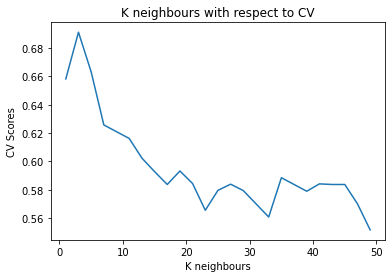

In [22]:
plt.plot(neighbours,cv_scores)
plt.title('K neighbours with respect to CV')
plt.xlabel('K neighbours')
plt.ylabel('CV Scores')
plt.show()

#### Insight
* Glass KNN model was built with different neighbours.
* The best K-neighbour for the model is 1 for without normalization and 3 after normalization 
* The accuracy score of KNN model without normalization with neighbour 1 is 0.7209 that is 72.09%.
* The accuracy score of KNN model with normalization with neighbour 3 is 0.7674 that is 76.74%.